In [2]:
#number 1

import math
import numpy as np

arr = np.random.random((10,3))
print(arr)

print( arr[np.arange(arr.shape[0]), np.argmin(abs(arr - 0.5), axis = 1)] )

[[0.40478078 0.89649089 0.1340114 ]
 [0.06164646 0.54470697 0.3752608 ]
 [0.62015799 0.16989446 0.66112287]
 [0.27361739 0.29538068 0.92726963]
 [0.26876764 0.88496909 0.79867133]
 [0.21591343 0.29401968 0.38418015]
 [0.05006834 0.76634117 0.27299956]
 [0.66484227 0.17529646 0.59598651]
 [0.98718431 0.48629721 0.2028937 ]
 [0.94872231 0.64087896 0.10260376]]
[0.40478078 0.54470697 0.62015799 0.29538068 0.26876764 0.38418015
 0.27299956 0.59598651 0.48629721 0.64087896]


In [3]:
#number 2

mass = np.random.random((6,6))
print (mass)
for i in range(6): 
    print(sum(mass[i]) / (np.min(mass, axis = 0))[i])

[[0.92936861 0.86108368 0.77516985 0.67689286 0.0112881  0.46552767]
 [0.6761193  0.33958052 0.66416903 0.75774148 0.18013307 0.94026824]
 [0.87797026 0.74814598 0.71349025 0.54940024 0.18878687 0.08228973]
 [0.6334319  0.35867731 0.60248599 0.57496449 0.62915793 0.31861492]
 [0.2599629  0.98755621 0.34755843 0.90764018 0.82426867 0.93998828]
 [0.74093754 0.69091117 0.38205692 0.77545773 0.42063886 0.28881189]]
14.30716003208813
10.477667103307255
9.092236068161464
5.674064758891329
378.0063478673578
40.08779865278979


In [4]:
#number 3 

x = np.array([6, 2, 0, 3, 0, 0, 5, 0, 7])

zero = (x==0)
print(zero[:-1])
print ( x[1:][ zero[:-1] ] )


[False False  True False  True  True False  True]
[3 0 5 7]


In [5]:
#number 4

x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])

for k in i: x[k] += 1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


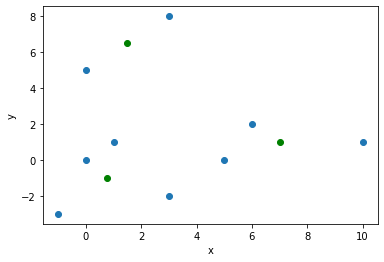

In [9]:
#number 5: k_means
import matplotlib.pyplot as plt
import math



def k_means (data, k, e):
    
    centr = np.zeros(k*2).reshape((k,2)) 
    centr[:, [0,1]] = data[:k, [0,1]]
    shift = np.full((k), 10*e) 
    
    new_coordinate = np.ones(k*3).reshape((k,3))
    dist = np.zeros(len(data)*k).reshape((len(data), k))
    
    while (shift.max() >= e ):
   
        for i in range(len(data)):
            dist[i][:] =  ((data[i,0] - centr[:,0])**2 + (data[i,1] - centr[:,1])**2)**(1/2)
            arg = np.argmin(dist[i])
            new_coordinate[arg, 0] += data[i,0]
            new_coordinate[arg, 1] += data[i,1]
            new_coordinate[arg, 2] += 1
        

        new_coordinate[:,0] = new_coordinate[:,0]/ new_coordinate[:,2]
        new_coordinate[:,1] = new_coordinate[:,1]/ new_coordinate[:,2]
        shift[:] = ( (centr[:,0] - new_coordinate[:,0])**2 + (centr[:,1] - new_coordinate[:,1])**2 ) **(1/2)
        

        
        centr[:,0] = new_coordinate[:,0]
        centr[:,1] = new_coordinate[:,1]
        new_coordinate[:] = 0


    return centr

data = np.array( [ [0,0],[0,5],[5,0],[6,2],[3,8],[10,1],[-1,-3],[3,-2],[1,1] ] )

k = 3
e =10**(-5)
centr = k_means(data, k, e)

plt.scatter(data[:,0], data[:,1])
plt.scatter(centr[:,0], centr[:,1], c='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
